In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os

from cal_omega_barV import get_bar_v_omega
from general_PD import find_long_instabi, find_short_instabi, find_contours

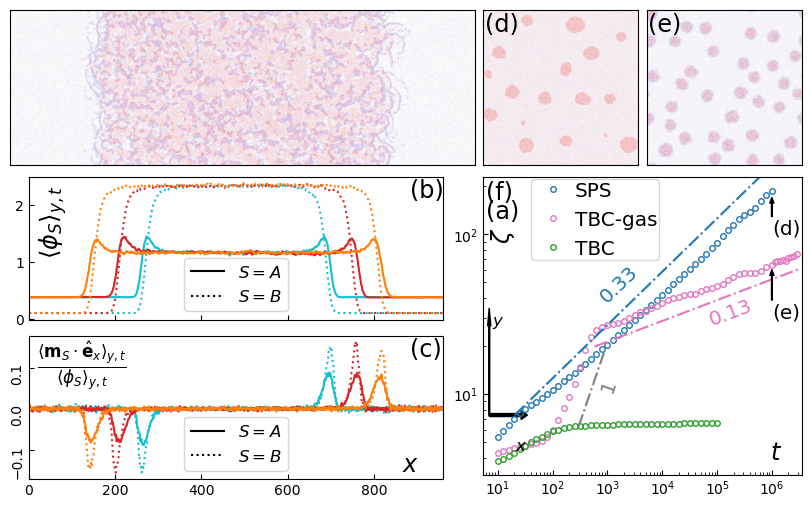

In [2]:
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

def get_q1(q_radial, Sq):
    """ Get the first moment of s(q, t). """
    I0 = np.sum(Sq)
    I1 = np.sum(q_radial * Sq)
    q1 = I1 / I0
    return q1


def add_line(ax,
             x_beg,
             y_beg,
             x_end,
             slope,
             label=None,
             xl=None,
             yl=None,
             fontsize="x-large",
             scale="log",
             c="#7f7f7f",
             lw=None,
             deg=None):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if scale == "lin":
        slope_new = slope * (xmax - xmin) / (ymax - ymin)
    else:
        slope_new = slope * (np.log10(xmax / xmin) / np.log10(ymax / ymin))
    x = np.linspace(x_beg, x_end, 100)
    y = slope_new * (x - x_beg) + y_beg
    ax.plot(x, y, "-.", transform=ax.transAxes, color=c, lw=lw)
    if label is not None:
        if deg is None:
            width = ax.bbox.width
            height = ax.bbox.height
            deg = np.arctan(slope_new * height / width) * 180 / np.pi
        dx = x_end - x_beg
        if xl is None:
            xl = x_beg + dx * 0.3
        if yl is None:
            yl = y_beg + dx * 0.6 * slope_new
        ax.text(
            xl,
            yl,
            label,
            transform=ax.transAxes,
            rotation=deg,
            color=c,
            fontsize=fontsize)


fig = plt.figure(constrained_layout=True, figsize=(8, 5))
subfigs = fig.subfigures(2, 1, wspace=0.001, hspace=0.001, height_ratios=[1.6, 3.1])

subfigs_top = subfigs[0].subfigures(1, 3, wspace=0.0001, hspace=0.001, width_ratios=[2.9, 1, 1])
ax1 = subfigs_top[0].subplots()
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/L480_160.jpg")
ax1.imshow(im)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = subfigs_top[1].subplots()
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/SPS.jpg")
ax2.imshow(im)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = subfigs_top[2].subplots()
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/TBC_gas.jpg")
ax3.imshow(im)
ax3.set_xticks([])
ax3.set_yticks([])

subfigs_bot = subfigs[1].subfigures(1, 2, wspace=0.001, hspace=0.001, width_ratios=[8-3.6, 3.55])

axes_profile = subfigs_bot[0].subplots(2, 1, sharex=True)
ax1 = subfigs_bot[1].subplots()

Sq_folder = "/home/yduan/code/Quorum_sensing/data/Sqt_rho"
fins = [f"{Sq_folder}/L1280_1280_Dr0.100_k0.70_p3_6_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        f"{Sq_folder}/L1280_1280_Dr0.100_k0.70_p5.5_3.85_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        f"{Sq_folder}/L640_640_Dr0.100_k0.70_p20_20_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        # f"{Sq_folder}/L80_80_Dr6.000_6.000_k0.70_p80_80_r80_80_80_e-0.200_-2.200_J-3.125_0.320_h0.100_1000.npz"
        ]
label_list = ["SPS", "TBC-gas", "TBC"]
dt_list = [1/3, 1/3, 1/3, 1/3]
species = ["B", "A", "B", "A"]
c_list = ["tab:blue", "tab:pink", "tab:green", "tab:orange"]
for j, fin in enumerate(fins):
    with np.load(fin, "r") as data:
        t, q, rho_Sqt, rho_var = data["t"], data["q"], data["rho_Sqt"], data["rho_var"]
    if j == 1:
        mask = t <= 3e6
        t = t[mask]
        rho_Sqt = rho_Sqt[:, mask]
    q1_A, q1_B = np.zeros((2, t.size))
    for i in range(t.size):
        q1_A[i] = get_q1(q, rho_Sqt[0][i])
        q1_B[i] = get_q1(q, rho_Sqt[1][i])
    if species[j] == "A":
        R1 = 2 * np.pi/q1_A
    else:
        R1 = 2 * np.pi/q1_B
    
    ax1.plot(t, R1, "o", fillstyle="none", c=c_list[j], ms=4, label=label_list[j])

ax1.arrow(0.02, 0.2, 0.1, 0, transform=ax1.transAxes, width=0.01, color="k", ec="k", head_length=0.02)
ax1.arrow(0.02, 0.2, 0, 0.3, transform=ax1.transAxes, width=0.01/3, color="k", ec="k", head_length=0.02*3)
ax1.text(0.1, 0.08, r"$x$", fontsize="large", transform=ax1.transAxes)
ax1.text(0.03, 0.5, r"$y$", fontsize="large", transform=ax1.transAxes)

files = ["data/lever_rule/Lx960_p7.6525_10.5675.npz",
         "data/lever_rule/Lx960_p8.625_13.36.npz",
         "data/lever_rule/Lx960_p9.597_16.152.npz"
        ]

# c_list = plt.cm.get_cmap('tab20').colors[6:]
c_list = ["tab:cyan", "tab:red", "tab:orange"]

# labels = [r"$7.65, 10.57$", r"$8.63, 13.36$", r"$9.60, 16.15$"]
for i, fin in enumerate(files):
    with np.load(fin, "rb") as data:
        x = data["x"]
        rhoA = data["rhoA"]
        rhoB = data["rhoB"]
        mA = data["mxA"] / data["rhoA"]
        mB = data["mxB"] / data["rhoB"]
        axes_profile[0].plot(x, rhoA/10, c=c_list[i])
        axes_profile[0].plot(x, rhoB/10, ":", c=c_list[i])
        # ax2.plot(x, rhoB/10, c=c_list[i])
        axes_profile[1].plot(x, mA, c=c_list[i])
        axes_profile[1].plot(x, mB, ":", c=c_list[i])
axes_profile[0].set_xlim(0, 960)

line1 = axes_profile[0].axvline(-100, linestyle="-", c="k", label=r"$S=A$")
line2 = axes_profile[0].axvline(-100, linestyle=":", c="k", label=r"$S=B$")
axes_profile[0].legend(loc="lower center", fontsize="large")
line1 = axes_profile[1].axvline(-100, linestyle="-", c="k", label=r"$S=A$")
line2 = axes_profile[1].axvline(-100, linestyle=":", c="k", label=r"$S=B$")
axes_profile[1].legend(loc="lower center", fontsize="large")

ax1.set_xscale("log")
ax1.set_yscale("log")

title_font_size = "x-large"
label_font_size = "x-large"
# ax2.set_ylabel(r"$\langle \phi_A(\mathbf{r})\rangle_{y,t}$", fontsize="large", labelpad=0.1)
# ax3.set_ylabel(r"$\langle \phi_B(\mathbf{r})\rangle_{y,t}$", fontsize="large", labelpad=0.1)

axes_profile[0].text(0.02, 0.5, r"$\langle \phi_S\rangle_{y, t}$", fontsize="xx-large", rotation=90, transform=axes_profile[0].transAxes)
# axes_profile[1].text(0.02, 0.65, r"$\tilde{m}_{x,S}$", fontsize="xx-large", rotation=90, transform=axes_profile[1].transAxes)
axes_profile[1].text(0.02, 0.74, r"$\frac{\langle \mathbf{m}_S\cdot \hat{\mathbf{e}}_x\rangle_{y, t}}{\langle \phi_S\rangle_{y, t}}$", fontsize="xx-large", rotation=0, transform=axes_profile[1].transAxes)
axes_profile[1].text(0.9, 0.05, r"$x$", fontsize="xx-large", rotation=0, transform=axes_profile[1].transAxes)
for tick in axes_profile[1].get_yticklabels():
    tick.set_rotation(90)
ax1.text(0.9, 0.05, r"$t$", fontsize="xx-large", rotation=0, transform=ax1.transAxes)
ax1.text(0.02, 0.8, r"$\zeta$", fontsize="xx-large", rotation=90, transform=ax1.transAxes)

ax1.legend(fontsize="x-large", loc=(0.15, 0.72), handletextpad=0.1, borderpad=0.1)

ax1.annotate('(d)', xy=(1e6, 170), xytext=(1e6, 100),
            arrowprops=dict(facecolor='black', width=0.5, headwidth=3, headlength=4), fontsize="x-large")
ax1.annotate('(e)', xy=(1e6, 60), xytext=(1e6, 30),
            arrowprops=dict(facecolor='black', width=0.5, headwidth=3, headlength=4), fontsize="x-large")
bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax1.text(0.01, 0.86, "(a)", fontsize="xx-large", transform=ax1.transAxes)
ax2.text(0.01, 0.86, "(d)", fontsize="xx-large", transform=ax2.transAxes)
ax3.text(0.01, 0.86, "(e)", fontsize="xx-large", transform=ax3.transAxes)
axes_profile[0].text(0.92, 0.855, "(b)", fontsize="xx-large", transform=axes_profile[0].transAxes)
axes_profile[1].text(0.92, 0.855, "(c)", fontsize="xx-large", transform=axes_profile[1].transAxes)
ax1.text(0.01, 0.925, "(f)", fontsize="xx-large", transform=ax1.transAxes)


# ax4.text(0.01, 0.88, "(d)", fontsize="x-large", transform=ax4.transAxes)
# ax5.text(0.01, 0.94, "(e)", fontsize="x-large", transform=ax5.transAxes)

ax1.set_xlim(xmax=3.5e6)
add_line(ax1, 0.1, 0.2, 0.95, 1/3, label="0.33", yl=0.58, c="tab:blue")
# add_line(ax5, 0.3, 0.4, 0.95, 0.13, label="0.13", xl=0.7, yl=0.5, c="tab:pink")
add_line(ax1, 0.35, 0.43, 0.99, 0.13, label="0.13", xl=0.7, yl=0.5, c="tab:pink")
add_line(ax1, 0.3, 0.16, 0.38, 1, label="1", xl=0.36, yl=0.28, c="tab:grey")


plt.show()
# plt.savefig("fig/f3_v3.pdf", dpi=300)
plt.close()

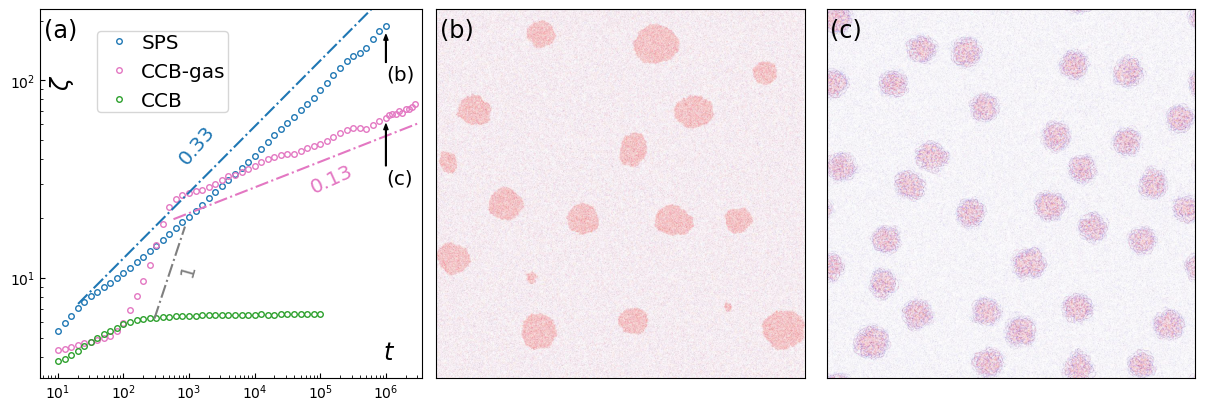

In [3]:
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)


Sq_folder = "/home/yduan/code/Quorum_sensing/data/Sqt_rho"
fins = [f"{Sq_folder}/L1280_1280_Dr0.100_k0.70_p3_6_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        f"{Sq_folder}/L1280_1280_Dr0.100_k0.70_p5.5_3.85_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        f"{Sq_folder}/L640_640_Dr0.100_k0.70_p20_20_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        # f"{Sq_folder}/L80_80_Dr6.000_6.000_k0.70_p80_80_r80_80_80_e-0.200_-2.200_J-3.125_0.320_h0.100_1000.npz"
        ]
label_list = ["SPS", "CCB-gas", "CCB"]
dt_list = [1/3, 1/3, 1/3, 1/3]
species = ["B", "A", "B", "A"]
c_list = ["tab:blue", "tab:pink", "tab:green", "tab:orange"]
for j, fin in enumerate(fins):
    with np.load(fin, "r") as data:
        t, q, rho_Sqt, rho_var = data["t"], data["q"], data["rho_Sqt"], data["rho_var"]
    if j == 1:
        mask = t <= 3e6
        t = t[mask]
        rho_Sqt = rho_Sqt[:, mask]
    q1_A, q1_B = np.zeros((2, t.size))
    for i in range(t.size):
        q1_A[i] = get_q1(q, rho_Sqt[0][i])
        q1_B[i] = get_q1(q, rho_Sqt[1][i])
    if species[j] == "A":
        R1 = 2 * np.pi/q1_A
    else:
        R1 = 2 * np.pi/q1_B
    
    ax1.plot(t, R1, "o", fillstyle="none", c=c_list[j], ms=4, label=label_list[j])



im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/SPS.jpg")
ax2.imshow(im)
ax2.set_xticks([])
ax2.set_yticks([])

im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/TBC_gas.jpg")
ax3.imshow(im)
ax3.set_xticks([])
ax3.set_yticks([])

c_list = ["tab:cyan", "tab:red", "tab:orange"]

ax1.set_xscale("log")
ax1.set_yscale("log")

title_font_size = "x-large"
label_font_size = "x-large"
ax1.text(0.9, 0.05, r"$t$", fontsize="xx-large", rotation=0, transform=ax1.transAxes)
ax1.text(0.02, 0.8, r"$\zeta$", fontsize="xx-large", rotation=90, transform=ax1.transAxes)

ax1.legend(fontsize="x-large", loc=(0.15, 0.72), handletextpad=0.1, borderpad=0.1)

ax1.annotate('(b)', xy=(1e6, 170), xytext=(1e6, 100),
            arrowprops=dict(facecolor='black', width=0.5, headwidth=3, headlength=4), fontsize="x-large")
ax1.annotate('(c)', xy=(1e6, 60), xytext=(1e6, 30),
            arrowprops=dict(facecolor='black', width=0.5, headwidth=3, headlength=4), fontsize="x-large")
ax1.text(0.01, 0.925, "(a)", fontsize="xx-large", transform=ax1.transAxes)
bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax2.text(0.01, 0.925, "(b)", fontsize="xx-large", transform=ax2.transAxes)
ax3.text(0.01, 0.925, "(c)", fontsize="xx-large", transform=ax3.transAxes)

ax1.set_xlim(xmax=3.5e6)
add_line(ax1, 0.1, 0.2, 0.95, 1/3, label="0.33", yl=0.58, c="tab:blue")
add_line(ax1, 0.35, 0.43, 0.99, 0.13, label="0.13", xl=0.7, yl=0.5, c="tab:pink")
add_line(ax1, 0.3, 0.16, 0.38, 1, label="1", xl=0.36, yl=0.28, c="tab:grey")

plt.show()
# plt.savefig("fig/coarsening_two_snaps.pdf", dpi=300)
plt.close()

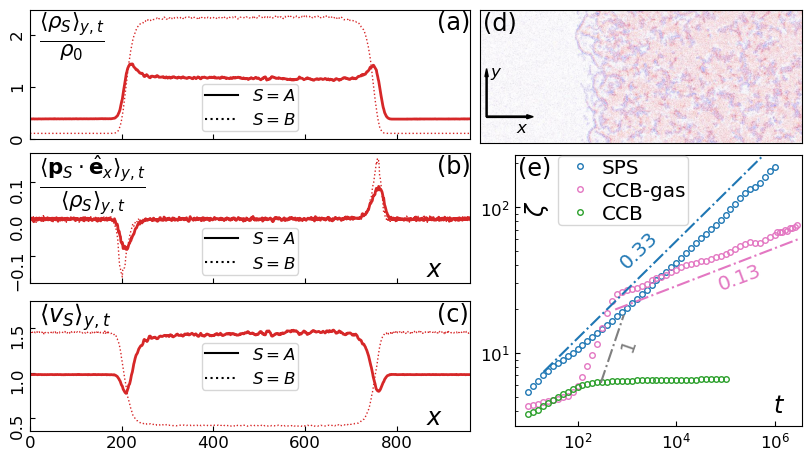

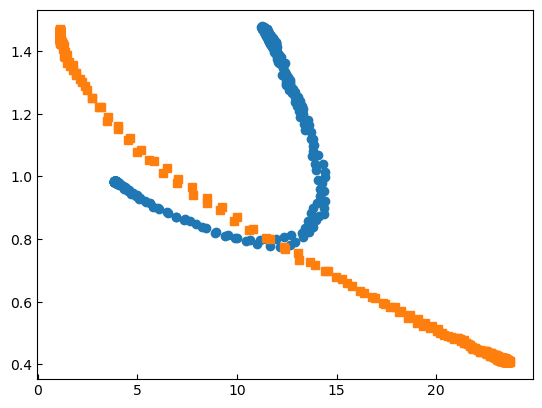

In [7]:
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

def get_q1(q_radial, Sq):
    """ Get the first moment of s(q, t). """
    I0 = np.sum(Sq)
    I1 = np.sum(q_radial * Sq)
    q1 = I1 / I0
    return q1


def add_line(ax,
             x_beg,
             y_beg,
             x_end,
             slope,
             label=None,
             xl=None,
             yl=None,
             fontsize="x-large",
             scale="log",
             c="#7f7f7f",
             lw=None,
             deg=None):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if scale == "lin":
        slope_new = slope * (xmax - xmin) / (ymax - ymin)
    else:
        slope_new = slope * (np.log10(xmax / xmin) / np.log10(ymax / ymin))
    x = np.linspace(x_beg, x_end, 100)
    y = slope_new * (x - x_beg) + y_beg
    ax.plot(x, y, "-.", transform=ax.transAxes, color=c, lw=lw)
    if label is not None:
        if deg is None:
            width = ax.bbox.width
            height = ax.bbox.height
            deg = np.arctan(slope_new * height / width) * 180 / np.pi
        dx = x_end - x_beg
        if xl is None:
            xl = x_beg + dx * 0.3
        if yl is None:
            yl = y_beg + dx * 0.6 * slope_new
        ax.text(
            xl,
            yl,
            label,
            transform=ax.transAxes,
            rotation=deg,
            color=c,
            fontsize=fontsize)


fig = plt.figure(constrained_layout=True, figsize=(8, 4.5))
subfigs = fig.subfigures(1, 2, wspace=0.001, hspace=0.001, width_ratios=[8-3.3, 3.3])

# subfigs_left = subfigs[0].subfigures(3, 1, wspace=0.0001, hspace=0.001)
# im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/L480_160.jpg")
# ax1.imshow(im)
# ax1.set_xticks([])
# ax1.set_yticks([])


subfigs_right = subfigs[1].subfigures(2, 1, wspace=0.001, hspace=0.01, height_ratios=[1.5, 3.2])

axes_profile = subfigs[0].subplots(3, 1, sharex=True, gridspec_kw=dict(hspace=0, wspace=0))
ax_snap = subfigs_right[0].subplots()
ax1 = subfigs_right[1].subplots()

im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig3/interface.jpg")
ax_snap.imshow(im)
ax_snap.set_xticks([])
ax_snap.set_yticks([])
Sq_folder = "/home/yduan/code/Quorum_sensing/data/Sqt_rho"
fins = [f"{Sq_folder}/L1280_1280_Dr0.100_k0.70_p3_6_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        f"{Sq_folder}/L1280_1280_Dr0.100_k0.70_p5.5_3.85_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        f"{Sq_folder}/L640_640_Dr0.100_k0.70_p20_20_r10_10_10_e-2.000_J0.500_-0.500_h0.333_1000.npz",
        # f"{Sq_folder}/L80_80_Dr6.000_6.000_k0.70_p80_80_r80_80_80_e-0.200_-2.200_J-3.125_0.320_h0.100_1000.npz"
        ]
# label_list = ["SPS", "TBC-gas", "TBC"]
label_list = ["SPS", "CCB-gas", "CCB"]

dt_list = [1/3, 1/3, 1/3, 1/3]
species = ["B", "A", "B", "A"]
c_list = ["tab:blue", "tab:pink", "tab:green", "tab:orange"]
for j, fin in enumerate(fins):
    with np.load(fin, "r") as data:
        t, q, rho_Sqt, rho_var = data["t"], data["q"], data["rho_Sqt"], data["rho_var"]
    if j == 1:
        mask = t <= 3e6
        t = t[mask]
        rho_Sqt = rho_Sqt[:, mask]
    q1_A, q1_B = np.zeros((2, t.size))
    for i in range(t.size):
        q1_A[i] = get_q1(q, rho_Sqt[0][i])
        q1_B[i] = get_q1(q, rho_Sqt[1][i])
    if species[j] == "A":
        R1 = 2 * np.pi/q1_A
    else:
        R1 = 2 * np.pi/q1_B
    
    ax1.plot(t, R1, "o", fillstyle="none", c=c_list[j], ms=4, label=label_list[j])

ax_snap.arrow(0.02, 0.2, 0.125, 0, transform=ax_snap.transAxes, width=0.01, color="k", ec="k", head_length=0.02)
ax_snap.arrow(0.02, 0.2, 0, 0.3, transform=ax_snap.transAxes, width=0.01/3, color="k", ec="k", head_length=0.02*3)
ax_snap.text(0.11, 0.08, r"$x$", fontsize="large", transform=ax_snap.transAxes)
ax_snap.text(0.03, 0.5, r"$y$", fontsize="large", transform=ax_snap.transAxes)

files = ["data/lever_rule/Lx960_p7.6525_10.5675.npz",
         "data/lever_rule/Lx960_p8.625_13.36.npz",
         "data/lever_rule/Lx960_p9.597_16.152.npz"
        ]

# c_list = plt.cm.get_cmap('tab20').colors[6:]
c_list = ["tab:cyan", "tab:red", "tab:orange"]

# labels = [r"$7.65, 10.57$", r"$8.63, 13.36$", r"$9.60, 16.15$"]
for i, fin in enumerate(files):
    with np.load(fin, "rb") as data:
        if i != 1:
            continue
        x = data["x"]
        rhoA = data["rhoA"]
        rhoB = data["rhoB"]
        mA = data["mxA"] / data["rhoA"]
        mB = data["mxB"] / data["rhoB"]
        axes_profile[0].plot(x, rhoA/10, c=c_list[i], lw=2)
        axes_profile[0].plot(x, rhoB/10, ":", c=c_list[i], lw=1)
        # ax2.plot(x, rhoB/10, c=c_list[i])
        axes_profile[1].plot(x, mA, c=c_list[i], lw=2)
        axes_profile[1].plot(x, mB, ":", c=c_list[i], lw=1)
        vA = data["vA"]
        vB = data["vB"] 
        axes_profile[2].plot(x, vA, c=c_list[i], lw=2)
        axes_profile[2].plot(x, vB, ":", c=c_list[i], lw=1)
        if i == 0:
            mask = np.logical_or(x<200, x>800)
            rhoA_g = np.mean(rhoA[mask])
            rhoB_g = np.mean(rhoB[mask])
            print("gas binodals: (%.4f, %.4f)" % (rhoA_g, rhoB_g))
        elif i == 2:
            mask = np.logical_and(x>400, x<600)
            rhoA_l = np.mean(rhoA[mask])
            rhoB_l = np.mean(rhoB[mask])
            print("liquid binodals: (%.4f, %.4f)" % (rhoA_l, rhoB_l))

axes_profile[0].set_xlim(0, 960)

line1 = axes_profile[0].axvline(-100, linestyle="-", c="k", label=r"$S=A$")
line2 = axes_profile[0].axvline(-100, linestyle=":", c="k", label=r"$S=B$")
axes_profile[0].legend(loc="lower center", fontsize="large", borderpad=0.2)
line1 = axes_profile[1].axvline(-100, linestyle="-", c="k", label=r"$S=A$")
line2 = axes_profile[1].axvline(-100, linestyle=":", c="k", label=r"$S=B$")
axes_profile[1].legend(loc="lower center", fontsize="large", borderpad=0.2)
line1 = axes_profile[2].axvline(-100, linestyle="-", c="k", label=r"$S=A$")
line2 = axes_profile[2].axvline(-100, linestyle=":", c="k", label=r"$S=B$")
axes_profile[2].legend(loc="center", fontsize="large", borderpad=0.2)


axes_profile[0].tick_params(labelsize='large')
axes_profile[1].tick_params(labelsize='large')
axes_profile[2].tick_params(labelsize='large')



ax1.set_xscale("log")
ax1.set_yscale("log")

title_font_size = "x-large"
label_font_size = "x-large"
# ax2.set_ylabel(r"$\langle \phi_A(\mathbf{r})\rangle_{y,t}$", fontsize="large", labelpad=0.1)
# ax3.set_ylabel(r"$\langle \phi_B(\mathbf{r})\rangle_{y,t}$", fontsize="large", labelpad=0.1)

# axes_profile[1].text(0.02, 0.65, r"$\tilde{m}_{x,S}$", fontsize="xx-large", rotation=90, transform=axes_profile[1].transAxes)
axes_profile[2].text(0.9, 0.05, r"$x$", fontsize="xx-large", rotation=0, transform=axes_profile[2].transAxes)
axes_profile[1].text(0.9, 0.05, r"$x$", fontsize="xx-large", rotation=0, transform=axes_profile[1].transAxes)

axes_profile[0].text(0.02, 0.70, r"$\frac{\langle \rho_S\rangle_{y, t}}{\rho_0}$", fontsize=22, rotation=0, transform=axes_profile[0].transAxes)
axes_profile[1].text(0.02, 0.68, r"$\frac{\langle \mathbf{p}_S\cdot \hat{\mathbf{e}}_x\rangle_{y, t}}{\langle \rho_S\rangle_{y, t}}$", fontsize=22, rotation=0, transform=axes_profile[1].transAxes)
axes_profile[2].text(0.02, 0.84, r"$\langle v_S\rangle_{y, t}$", fontsize="xx-large", rotation=0, transform=axes_profile[2].transAxes)



axes_profile[2].set_ylim(ymax=1.8)
for tick in axes_profile[1].get_yticklabels():
    tick.set_rotation(90)
for tick in axes_profile[2].get_yticklabels():
    tick.set_rotation(90)
for tick in axes_profile[0].get_yticklabels():
    tick.set_rotation(90)
ax1.text(0.9, 0.05, r"$t$", fontsize="xx-large", rotation=0, transform=ax1.transAxes)
ax1.text(0.03, 0.8, r"$\zeta$", fontsize="xx-large", rotation=90, transform=ax1.transAxes)

ax1.legend(fontsize="x-large", loc=(0.15, 0.74), handletextpad=0.1, borderpad=0.1, labelspacing=0.2)

# ax_scaling.annotate('(d)', xy=(1e6, 170), xytext=(1e6, 100),
#             arrowprops=dict(facecolor='black', width=0.5, headwidth=3, headlength=4), fontsize="x-large")
# ax_scaling.annotate('(e)', xy=(1e6, 60), xytext=(1e6, 30),
#             arrowprops=dict(facecolor='black', width=0.5, headwidth=3, headlength=4), fontsize="x-large")
bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax_snap.text(0.01, 0.845, "(d)", fontsize="xx-large", transform=ax_snap.transAxes)
# ax2.text(0.01, 0.87, "(d)", fontsize="x-large", transform=ax2.transAxes)
# ax3.text(0.01, 0.87, "(e)", fontsize="x-large", transform=ax3.transAxes)
axes_profile[0].text(0.925, 0.845, "(a)", fontsize="xx-large", transform=axes_profile[0].transAxes)
axes_profile[1].text(0.925, 0.845, "(b)", fontsize="xx-large", transform=axes_profile[1].transAxes)
axes_profile[2].text(0.925, 0.845, "(c)", fontsize="xx-large", transform=axes_profile[2].transAxes)

ax1.text(0.01, 0.925, "(e)", fontsize="xx-large", transform=ax1.transAxes)
ax1.tick_params(labelsize='large')

# ax4.text(0.01, 0.88, "(d)", fontsize="x-large", transform=ax4.transAxes)
# ax5.text(0.01, 0.94, "(e)", fontsize="x-large", transform=ax5.transAxes)

ax1.set_xlim(xmax=3.5e6)
add_line(ax1, 0.1, 0.2, 0.95, 1/3, label="0.33", yl=0.58, c="tab:blue")
# add_line(ax5, 0.3, 0.4, 0.95, 0.13, label="0.13", xl=0.7, yl=0.5, c="tab:pink")
add_line(ax1, 0.35, 0.43, 0.99, 0.13, label="0.13", xl=0.7, yl=0.5, c="tab:pink")
add_line(ax1, 0.3, 0.16, 0.38, 1, label="1", xl=0.36, yl=0.28, c="tab:grey")


plt.show()
# plt.savefig("fig/f3_v4.pdf", dpi=200)
plt.close()

plt.plot(rhoA, vA, "o")
plt.plot(rhoB, vB, "s")
plt.show()
plt.close()

In [5]:
2*10 - 3.85


16.15